# All Important operations on a CSV File Using Pandas Library

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Reading any csv or json file

In [52]:
df = pd.read_csv("historical_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

Convert these 'object' columns into datetime

In [53]:
df['created_at'] =  pd.to_datetime(df['created_at'])
df['actual_delivery_time'] =  pd.to_datetime(df['actual_delivery_time'])

In [54]:
df['estimated_total_duration'] = df['actual_delivery_time'] - df['created_at']

In [55]:
df['time_duration'] = pd.to_timedelta(df['estimated_total_duration'])

# Convert the Timedelta to minutes
df['estimated_time_in_minutes'] = df['time_duration'].dt.total_seconds()/60

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 19 columns):
 #   Column                                        Non-Null Count   Dtype          
---  ------                                        --------------   -----          
 0   market_id                                     196441 non-null  float64        
 1   created_at                                    197428 non-null  datetime64[ns] 
 2   actual_delivery_time                          197421 non-null  datetime64[ns] 
 3   store_id                                      197428 non-null  int64          
 4   store_primary_category                        192668 non-null  object         
 5   order_protocol                                196433 non-null  float64        
 6   total_items                                   197428 non-null  int64          
 7   subtotal                                      197428 non-null  int64          
 8   num_distinct_items                          

In [57]:
df = df.drop(columns=['time_duration', 'estimated_total_duration'])


In [58]:
df = df.dropna()

In [59]:
df 

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,estimated_time_in_minutes
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,67.066667
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,26.433333
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,37.883333
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,49.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,65.116667
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,56.383333
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,50.133333
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,65.116667


In [60]:
X = df.drop(columns=['estimated_time_in_minutes','created_at','actual_delivery_time'])  # replace with the appropriate target column
y = df['estimated_time_in_minutes']  # replace with the appropriate target column

In [61]:
X = pd.get_dummies(X)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175777 entries, 0 to 197427
Data columns (total 86 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_id                                      175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            175777 

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [66]:
y_pred = clf.predict(X_test)


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1680.9292609942518
Mean Absolute Error: 16.136318836045056
R^2 Score: -3.4252424301893285


C:\Users\Aditya\AppData\Local\Temp\ipykernel_17248\190942555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gini Importance', y='Feature', data=non_zero_importance_df, palette='viridis')


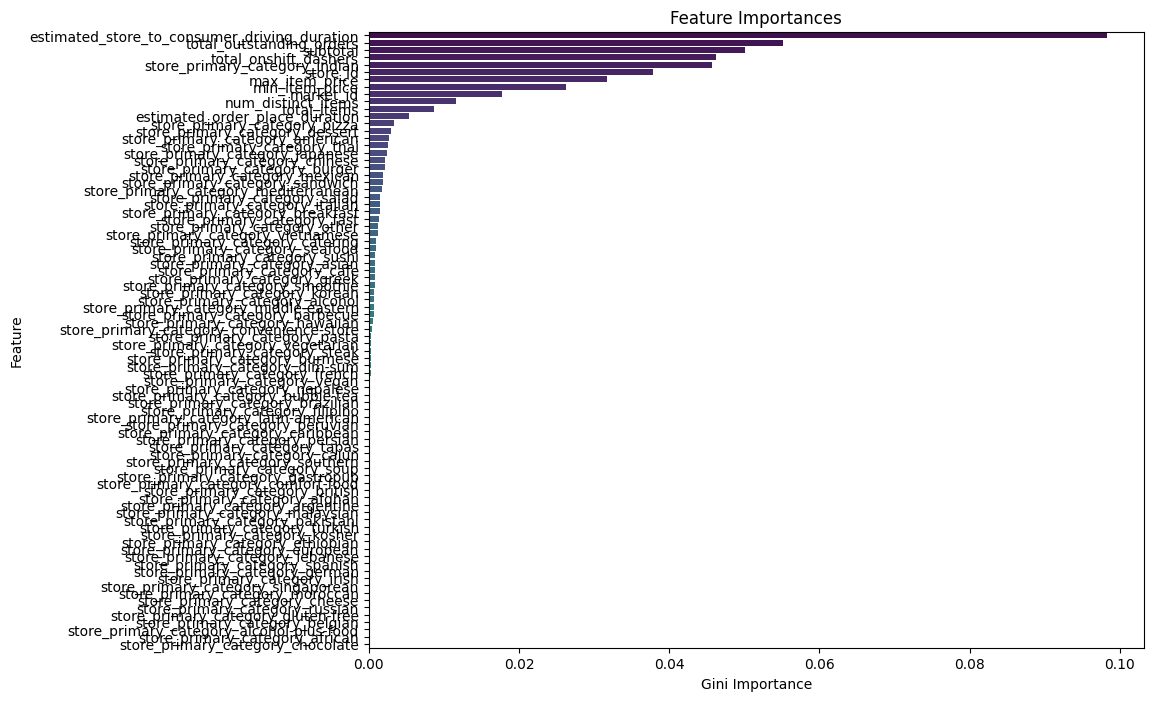

['estimated_store_to_consumer_driving_duration' 'total_outstanding_orders'
 'subtotal' 'total_onshift_dashers' 'store_primary_category_indian'
 'store_id' 'max_item_price' 'min_item_price' 'market_id'
 'num_distinct_items' 'total_items' 'estimated_order_place_duration'
 'store_primary_category_pizza' 'store_primary_category_dessert'
 'store_primary_category_american' 'store_primary_category_thai'
 'store_primary_category_japanese' 'store_primary_category_chinese'
 'store_primary_category_burger' 'store_primary_category_mexican'
 'store_primary_category_sandwich' 'store_primary_category_mediterranean'
 'store_primary_category_salad' 'store_primary_category_italian'
 'store_primary_category_breakfast' 'store_primary_category_fast'
 'store_primary_category_other' 'store_primary_category_vietnamese'
 'store_primary_category_catering' 'store_primary_category_seafood'
 'store_primary_category_sushi' 'store_primary_category_asian'
 'store_primary_category_cafe' 'store_primary_category_greek'


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf is your trained classifier and X is your feature matrix
feature_importances = clf.feature_importances_

# Create a DataFrame to display the Gini importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Gini Importance': feature_importances
}).sort_values(by='Gini Importance', ascending=False)

# Filter the DataFrame to include only features with non-zero Gini importance
non_zero_importance_df = feature_importance_df[feature_importance_df['Gini Importance'] < 0.1]

# Extract the features with non-zero Gini importance into an array
non_zero_features = non_zero_importance_df['Feature'].values

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Gini Importance', y='Feature', data=non_zero_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.show()

# Print the array of features with non-zero Gini importance
print(non_zero_features)